## 0. Get data

### 0.1 Install data from kaggle

In [1]:
!mkdir -p /root/.kaggle

In [2]:
import os

os.replace('/root/kaggle.json', '/root/.kaggle/kaggle.json')

In [3]:
import kaggle

In [4]:
!chmod 600 /root/.kaggle/kaggle.json

In [5]:
!ls

sample_data


In [6]:
!pwd

/content


In [7]:
!pwd
import os
os.mkdir('data')
os.chdir('/content/data')
!pwd

/content
/content/data


In [8]:
!kaggle datasets download -d jessicali9530/celeba-dataset

100% 1.33G/1.33G [00:38<00:00, 42.2MB/s]
100% 1.33G/1.33G [00:38<00:00, 37.3MB/s]


In [9]:
!pwd
os.chdir('/content')
!pwd

/content/data
/content


### 0.2 Unziping file

In [10]:
import zipfile
from pathlib import Path

data_dir = Path('data')
zipped_dataset_name = 'celeba-dataset.zip'
with zipfile.ZipFile(data_dir / zipped_dataset_name, 'r') as zip_ref:
  zip_ref.extractall(data_dir)

In [11]:
os.remove(data_dir / zipped_dataset_name)

### 0.3 Get DataFrames

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df_attr = pd.read_csv(data_dir / 'list_attr_celeba.csv')
df_bbox = pd.read_csv(data_dir / 'list_bbox_celeba.csv')
df_eval = pd.read_csv(data_dir / 'list_eval_partition.csv')
df_landmarks = pd.read_csv(data_dir / 'list_landmarks_align_celeba.csv')

In [14]:
print(f'There are {df_attr.isna().sum().sum()} missing values in df_attr')
print(f'There are {df_bbox.isna().sum().sum()} missing values in df_bbox')
print(f'There are {df_eval.isna().sum().sum()} missing values in df_eval')
print(f'There are {df_landmarks.isna().sum().sum()} missing values in df_landmarks')

There are 0 missing values in df_attr
There are 0 missing values in df_bbox
There are 0 missing values in df_eval
There are 0 missing values in df_landmarks


In [15]:
print(f'There is {len(os.listdir(data_dir / "img_align_celeba" / "img_align_celeba"))} images in data_dir / img_align_celeba / img_align_celeba')

There is 202599 images in data_dir / img_align_celeba / img_align_celeba


In [16]:
print(f'Shape of df_attr is {df_attr.shape}')
print(f'Shape of df_bbox is {df_bbox.shape}')
print(f'Shape of df_eval is {df_eval.shape}')
print(f'Shape of df_landmarks is {df_landmarks.shape}')

Shape of df_attr is (202599, 41)
Shape of df_bbox is (202599, 5)
Shape of df_eval is (202599, 2)
Shape of df_landmarks is (202599, 11)


In [17]:
df_attr.columns

Index(['image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young'],
      dtype='object')

### 0.4 Get info about simpsons facial features

In [18]:
### NEED TO CHECK
# dictionary_of_simpsons_facial_features = {
#     'abraham_grampa_simpson': [0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
#     'apu_nahasapeemapetilon': [0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
#     'bart_simpson': [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
#     'charles_montgomery_burns': [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#     'chief_wiggum': [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
#     'comic_book_guy': [0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
#     'edna_krabappel': [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
#     'homer_simpson': [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
#     'kent_brockman': [0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
#     'krusty_the_clown': [0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
#     'lenny_leonard': [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
#     'lisa_simpson': [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
#     'marge_simpson': [0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
#     'mayor_quimby': [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
#     'milhouse_van_houten': [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
#     'moe_szyslak': [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
#     'ned_flanders': [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
#     'nelson_muntz': [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
#     'principal_skinner': [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
#     'sideshow_bob': [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# }

# for key, value in dictionary_of_simpsons_facial_features.items():
#   while len(value) < 40:
#     value.append(0)

# simp_feat = pd.DataFrame(dictionary_of_simpsons_facial_features, index=df_attr.columns[1:]).T
# simp_feat

In [19]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'

## 1. Data Exploration

In [20]:
df_attr.set_index('image_id', inplace=True)
df_attr.replace(to_replace=-1, value=0, inplace=True)

In [21]:
# Constants
images_dir = data_dir / 'img_align_celeba' / 'img_align_celeba'

EXAMPLE_IMG_NAME = '000506.jpg'
EXAMPLE_IMG_PATH = images_dir / EXAMPLE_IMG_NAME

TRAINING_SIZE = 5000
TEST_SIZE = 1000
VALIDATION_SIZE = 1000
IMG_WIDTH = 224
IMG_HEIGHT = 224
IMG_SIZE = (IMG_WIDTH,IMG_HEIGHT)
NUM_EPOCHS = 20
BATCH_SIZE = 16

Arched_Eyebrows        1
Attractive             1
Brown_Hair             1
Heavy_Makeup           1
High_Cheekbones        1
Mouth_Slightly_Open    1
No_Beard               1
Oval_Face              1
Pointy_Nose            1
Rosy_Cheeks            1
Smiling                1
Straight_Hair          1
Wearing_Lipstick       1
Young                  1
Name: 000506.jpg, dtype: int64


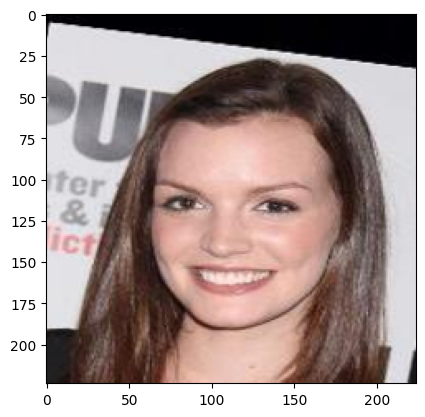

In [22]:
from PIL import Image

img = Image.open(EXAMPLE_IMG_PATH).resize(size=IMG_SIZE)

plt.imshow(img)

t = df_attr.loc[EXAMPLE_IMG_NAME]
print(t[t == 1])

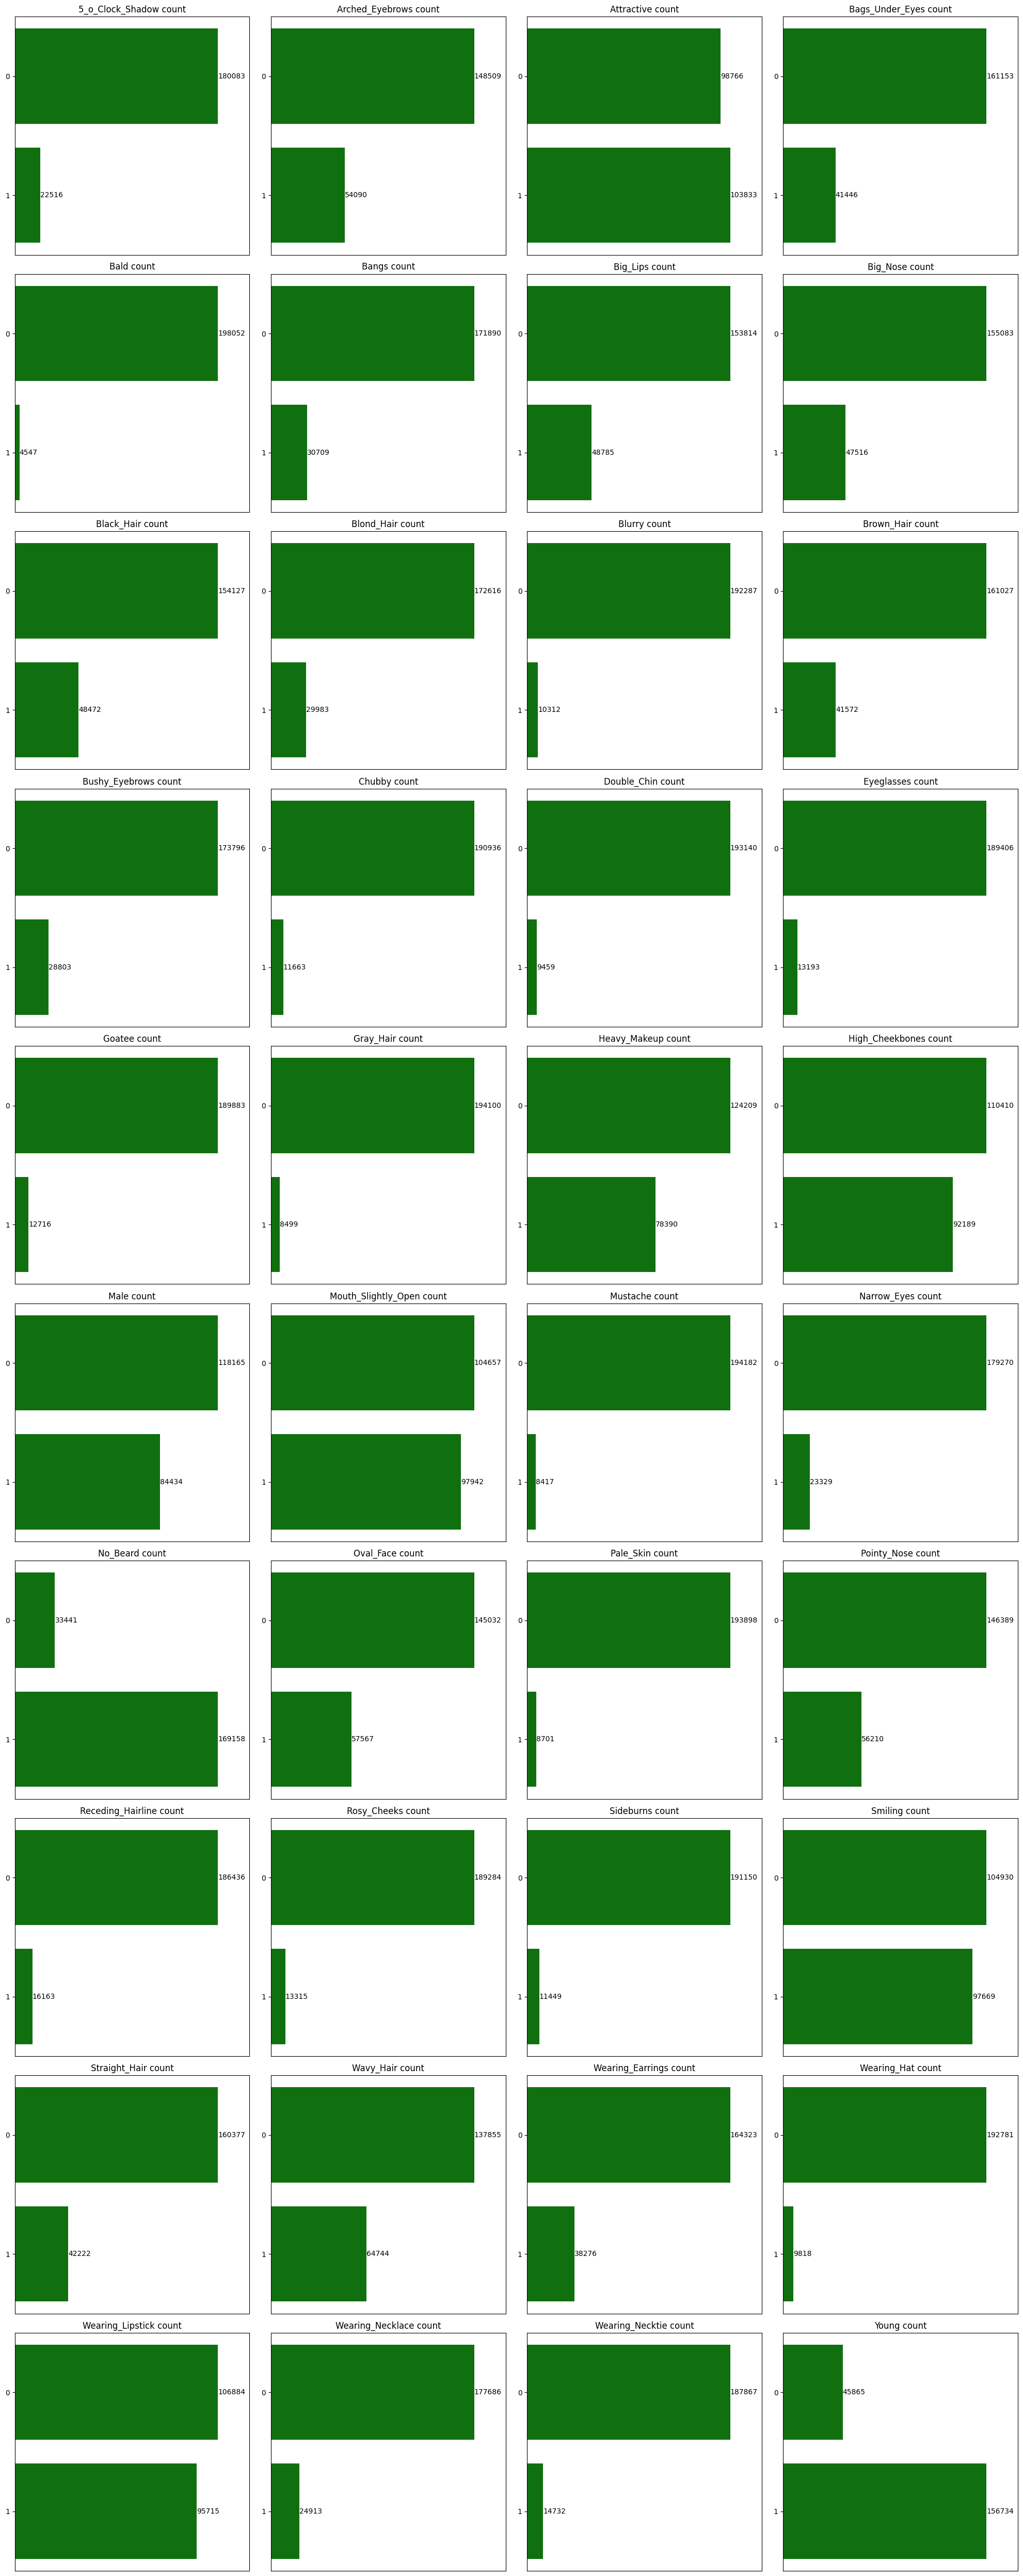

In [23]:
fig, axs = plt.subplots(10, 4, figsize=(20,50))

for i, ax in enumerate(axs.ravel()):
  col = df_attr.columns[i]

  sns.countplot(data=df_attr, y=col, color='g', ax=ax)

  for c in ax.containers:
    ax.bar_label(c)

  ax.set_title(f'{col} count', fontdict={'fontsize':12})
  xlim_top = ax.get_xlim()[1]
  ax.set_xlim(right=xlim_top * 1.1)
  ax.set_xticks([])
  ax.set_xlabel('')
  ax.set_ylabel('')

plt.tight_layout()
plt.show()

The most part of the features have imbalanced amount of data.

## 2. Split data into training and testing

In [23]:
df_eval.head()

,image_id,partition
0,000001.jpg,0
1,000002.jpg,0
2,000003.jpg,0
3,000004.jpg,0
4,000005.jpg,0


In [24]:
# 0 -> TRAINING
# 1 -> VALIDATION
# 2 -> TEST
df_eval.partition.value_counts().sort_index()

0    162770
1     19867
2     19962
Name: partition, dtype: int64

In [25]:
df_eval = df_eval.set_index('image_id')

In [26]:
df_attr.columns

Index(['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes',
       'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair',
       'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin',
       'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones',
       'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard',
       'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline',
       'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair',
       'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick',
       'Wearing_Necklace', 'Wearing_Necktie', 'Young'],
      dtype='object')

In [27]:
# TRAINING_SIZE = 100
# TEST_SIZE = 20
# VALIDATION_SIZE = 20

# features = ['Bald', 'Male', 'Young']

# def df_generator(partition, num_samples, features=features):
#   df = pd.DataFrame()
#   x_, y_ = [], []

#   df = df_eval[(df_eval['partition'] == partition)].sample(num_samples).join(df_attr, how='left')[features]

#   for index, target in df.iterrows():
#     im = Image.open(images_dir / index).convert('RGB')
#     im = im.resize(size=IMG_SIZE)

#     x_.append(im)
#     y_.append(target.to_list())

#   return df, x_, y_

# df_train, X_train, y_train = df_generator(0, TRAINING_SIZE)
# df_val, X_val, y_val = df_generator(1, VALIDATION_SIZE)
# df_test, X_test, y_test = df_generator(2, TEST_SIZE)

In [206]:
dictionary_of_simpsons_facial_features = {
    'homer_simpson':[-1,-1, -1, 1, 1, -1, -1, 1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, 1, -1, -1, -1, 0, 1, -1, 0, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, 0],
    'bart_simpson':[-1, -1, -1, 0, 0, -1, -1, 0, -1, -1, -1, -1, -1, 0, 0, -1, -1, -1, -1, -1, 1, -1, -1, -1, 1, 0, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1],
    'lisa_simpson':[-1, -1, -1, 0, 0, -1, -1, 0, -1, -1, -1, -1, -1, 0, 0, -1, -1, -1, -1, -1, 0, -1, -1, -1, 1, 0, -1, 1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, 1],
    'marge_simpson':[-1,-1, -1, 0, 0, -1, -1, 0, -1, -1, -1, -1, -1, 0, 0, -1, -1, -1, -1, -1, 0, -1, -1, -1, 1, 0, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 0]
}

simpson_features_df = pd.DataFrame(dictionary_of_simpsons_facial_features).T
simpson_features_df.columns = df_attr.columns

temp_df_simpson_features = (simpson_features_df.mean(axis=0) != -1).reset_index()

simpson_features_df = simpson_features_df[temp_df_simpson_features[temp_df_simpson_features[0] == True]['index']]
simpson_features_df

,Bags_Under_Eyes,Bald,Big_Nose,Chubby,Double_Chin,Male,No_Beard,Oval_Face,Pointy_Nose,Straight_Hair,Young
homer_simpson,1,1,1,1,1,1,0,1,0,0,0
bart_simpson,0,0,0,0,0,1,1,0,1,1,1
lisa_simpson,0,0,0,0,0,0,1,0,1,0,1
marge_simpson,0,0,0,0,0,0,1,0,1,1,0


In [188]:
import random

random.seed(42)
np.random.seed(42)

TRAINING_SIZE = 5000
TEST_SIZE = 1000
VALIDATION_SIZE = 1000

# features = ['Bald', 'Bags_Under_Eyes','Male','Eyeglasses', 'Young']
features = simpson_features_df.columns

def df_generator(partition, num_samples, features=features):
  num_samples = num_samples // len(features)
  df = pd.DataFrame()
  x_, y_ = [], []

  for feature in features:
      df_feature_1 = df_attr[features][(df_attr[feature] == 1) & (df_eval['partition'] == partition)].sample(num_samples//2)
      df_feature_0 = df_attr[features][(df_attr[feature] == 0) & (df_eval['partition'] == partition)].sample(num_samples//2)

      df = pd.concat([df, df_feature_1, df_feature_0])

  df = df.sample(frac=1)

  for index, target in df.iterrows():
      im = Image.open(images_dir / index).convert('RGB')
      im = im.resize(size=IMG_SIZE)

      x_.append(im)
      y_.append(target[features].to_list())

  return df, x_, y_

df_train, X_train, y_train = df_generator(0, TRAINING_SIZE)
df_val, X_val, y_val = df_generator(1, VALIDATION_SIZE)
df_test, X_test, y_test = df_generator(2, TEST_SIZE)

## 3. Pre-processing Images

In [189]:
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

In [190]:
train_transformer = transforms.Compose([
      transforms.Resize(IMG_SIZE),
      transforms.CenterCrop(IMG_SIZE),
      transforms.RandomChoice( [
                                transforms.RandomHorizontalFlip(p=0.5),
                                transforms.ColorJitter(contrast=0.9),
                                transforms.ColorJitter(brightness=0.1),
                                transforms.RandomApply( [ transforms.RandomHorizontalFlip(p=1), transforms.ColorJitter(contrast=0.9) ], p=0.5),
                                transforms.RandomApply( [ transforms.RandomHorizontalFlip(p=1), transforms.ColorJitter(brightness=0.1) ], p=0.5),
                                ] ),
      transforms.ToTensor(),
      transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
  ])

val_transformer = transforms.Compose([
      transforms.Resize(IMG_SIZE),
      transforms.ToTensor(),
      transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
  ])

In [191]:
class CustomDataset(Dataset):
  def __init__(self, data, transform=None):
    self.data = data
    self.transform = transform

  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    image, label = self.data[idx]

    if self.transform:
      image = self.transform(image)

    return image, label

In [192]:
X_y_train = [(x,y) for x, y in zip(X_train, y_train)]
X_y_val = [(x,y) for x, y in zip(X_val, y_val)]

train_data = CustomDataset(X_y_train, transform=train_transformer)
val_data = CustomDataset(X_y_val, transform=val_transformer)

def collate_fn(batch):
    images = [item[0] for item in batch]
    labels = [item[1] for item in batch]
    labels = torch.tensor(labels)
    return images, labels

train_dataloader = DataLoader(train_data, shuffle=True, batch_size=BATCH_SIZE, collate_fn=collate_fn)
val_dataloader = DataLoader(val_data, shuffle=True, batch_size=BATCH_SIZE, collate_fn=collate_fn)

## 4. Model

In [193]:
import torch
from torch import nn

In [194]:
def label_wise_accuracy(output, target):
    pred = (output > 0.5).float()
    correct = (pred == target).float()
    label_accuracy = torch.mean(correct, dim=0)
    return label_accuracy

In [195]:
class TinyVGG(nn.Module):
    def __init__(self, input_layers, hidden_layers, output_layers):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(input_layers, hidden_layers, kernel_size=3, stride=1, padding=0),
            nn.ReLU(),
            nn.Conv2d(hidden_layers, hidden_layers, kernel_size=3, stride=1, padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_layers, hidden_layers, kernel_size=3, stride=1, padding=0),
            nn.Tanh(),
            nn.Conv2d(hidden_layers, hidden_layers, kernel_size=3, stride=1, padding=0),
            nn.Tanh(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.conv_block_3 = nn.Sequential(
            nn.Conv2d(hidden_layers, hidden_layers, kernel_size=3, stride=1, padding=0),
            nn.Tanh(),
            nn.Conv2d(hidden_layers, hidden_layers, kernel_size=3, stride=1, padding=0),
            nn.Tanh(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_layers*24*24, out_features=output_layers)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.conv_block_3(x)
        x = self.classifier(x)
        return x

In [196]:
import torchvision
def create_mobilenet(num_classes,
                     seed=42):

  torch.manual_seed(seed)
  torch.cuda.manual_seed(seed)

  weights = torchvision.models.MobileNet_V2_Weights.DEFAULT

  model = torchvision.models.mobilenet_v2(weights=weights)

  transformer = weights.transforms()

  for param in model.parameters():
    param.requires_grad = False

  model.classifier = nn.Sequential(
      nn.Dropout(p=0.2, inplace=True),
      nn.Linear(1280, num_classes, bias=True)
      )

  return model , transformer

In [200]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = []

for i in range(len(features)):
    weights = compute_class_weight('balanced', classes=np.unique(np.array(y_train)[:, i]), y=np.array(y_train)[:, i])
    class_weights.append(torch.Tensor(weights))

class_weights = torch.stack(class_weights)
class_weights = class_weights[:,1].to(device)

In [201]:
class_weights

tensor([1.7266, 7.2727, 1.6000, 4.1379, 4.3636, 0.9836, 2.7273, 0.6417, 1.6438,
        2.0000, 2.1818, 0.7295], device='cuda:0')

In [202]:
from tqdm.auto import tqdm
from torch.optim.lr_scheduler import StepLR
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

torch.manual_seed(42)
torch.cuda.manual_seed(42)

# model = TinyVGG(3, 10, len(features)).to(device)
model = create_mobilenet(len(features))[0].to(device)

loss_fn = nn.BCEWithLogitsLoss(pos_weight=class_weights)
optimizer = torch.optim.Adam(model.parameters())

scheduler = StepLR(optimizer=optimizer,
                   step_size=3,
                   gamma=0.1,
                   last_epoch=-1,
                   verbose=True)

results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []
    }

# train_labels_df = pd.DataFrame(columns=features)
# test_labels_df = pd.DataFrame(columns=features)
# train_auc_df = pd.DataFrame(columns=features)
# test_auc_df = pd.DataFrame(columns=features)
train_f1_df = pd.DataFrame(columns=features)
test_f1_df =pd.DataFrame(columns=features)

model.train()
for epoch in tqdm(range(10)):

  ### TRAIN

  train_acc_label = []
  train_loss, train_acc = 0, 0
  list_of_preds_train = torch.tensor([])
  list_of_reals_train = torch.tensor([])

  for X_batch, y_batch in train_dataloader:
    X_batch = torch.stack(X_batch).to(device)
    y_batch = y_batch.type(torch.float32).to(device)

    y_pred = model(X_batch)

    loss = torch.zeros(1, device=device)

    for i in range(y_pred.shape[1]):
        column_loss = nn.BCEWithLogitsLoss(pos_weight=class_weights[i])(y_pred[:, i], y_batch[:, i])
        loss += column_loss

    # loss = loss_fn(y_pred, y_batch)
    train_loss += loss.item() / y_pred.shape[1]

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    acc_per_label = label_wise_accuracy(torch.sigmoid(y_pred), y_batch)
    train_acc_label.append(acc_per_label.cpu().numpy())

    train_acc += torch.mean(acc_per_label)

    list_of_preds_train = torch.cat((list_of_preds_train, torch.sigmoid(y_pred).detach().cpu()))
    list_of_reals_train = torch.cat((list_of_reals_train, y_batch.detach().cpu()))

  train_loss = train_loss / len(train_dataloader)
  train_acc = train_acc / len(train_dataloader)

  train_auc_label = torch.tensor([roc_auc_score(list_of_reals_train[:,i], list_of_preds_train[:,i]) if len(np.unique(list_of_reals_train[:,i])) != 1 else 0 for i in range(len(features))])
  train_auc = torch.mean(train_auc_label)

  train_f1_label = torch.tensor([f1_score(list_of_reals_train[:,i], (list_of_preds_train[:,i] >= 0.5).float()) if len(np.unique(list_of_reals_train[:,i])) != 1 else 0 for i in range(len(features))])
  train_f1 = torch.mean(train_f1_label)

  ### VALIDATION

  test_acc_label = []
  test_loss, test_acc = 0, 0
  list_of_preds_test = torch.tensor([])
  list_of_reals_test = torch.tensor([])

  model.eval()
  with torch.inference_mode():
      for X_batch, y_batch in val_dataloader:
          X_batch = torch.stack(X_batch).to(device)
          y_batch = y_batch.type(torch.float32).to(device)

          test_pred = model(X_batch)

          loss = torch.zeros(1, device=device)

          for i in range(test_pred.shape[1]):
              column_loss = nn.BCEWithLogitsLoss(pos_weight=class_weights[i])(test_pred[:, i], y_batch[:, i])
              loss += column_loss

          # test_loss += loss_fn(test_pred, y_batch)
          test_loss += loss.item() / test_pred.shape[1]

          acc_per_label = label_wise_accuracy(torch.sigmoid(test_pred), y_batch)
          test_acc_label.append(acc_per_label.cpu().numpy())

          test_acc += torch.mean(acc_per_label)

          list_of_preds_test = torch.cat((list_of_preds_test, torch.sigmoid(test_pred).detach().cpu()))
          list_of_reals_test = torch.cat((list_of_reals_test, y_batch.detach().cpu()))

      test_loss = test_loss / len(val_dataloader)
      test_acc = test_acc / len(val_dataloader)

      test_auc_label = torch.tensor([roc_auc_score(list_of_reals_test[:,i], list_of_preds_test[:,i]) if len(np.unique(list_of_reals_test[:,i])) != 1 else 0 for i in range(len(features))])
      test_auc = torch.mean(test_auc_label)

      test_f1_label = torch.tensor([f1_score(list_of_reals_test[:,i], (list_of_preds_test[:,i] >= 0.5).float()) if len(np.unique(list_of_reals_test[:,i])) != 1 else 0 for i in range(len(features))])
      test_f1 = torch.mean(test_f1_label)

  scheduler.step()

  results["train_loss"].append(train_loss)
  results["train_acc"].append(train_acc)
  results["test_loss"].append(test_loss)
  results["test_acc"].append(test_acc)

  print(f'Epoch: {epoch} | Train Loss: {train_loss:.5f} | Train Accuracy: {train_acc:.2f} | Train AUC: {train_auc} | Train F1 score: {train_f1} | Test loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f} | Test ROC_AUC: {test_auc} | Test F1 score: {test_f1}')

  # train_labels_df = pd.concat([train_labels_df, pd.DataFrame([np.array(train_acc_label).mean(axis=0)], columns = features)], axis=0).reset_index(drop=True)
  # test_labels_df = pd.concat([test_labels_df, pd.DataFrame([np.array(test_acc_label).mean(axis=0)], columns = features)], axis=0).reset_index(drop=True)
  # train_auc_df = pd.concat([train_auc_df, pd.DataFrame([train_auc_label.numpy()], columns = features)], axis=0).reset_index(drop=True)
  # test_auc_df = pd.concat([test_auc_df, pd.DataFrame([test_auc_label.numpy()], columns = features)], axis=0).reset_index(drop=True)
  train_f1_df = pd.concat([train_f1_df, pd.DataFrame([train_f1_label.numpy()], columns = features)], axis=0).reset_index(drop=True)
  test_f1_df = pd.concat([test_f1_df, pd.DataFrame([test_f1_label.numpy()], columns = features)], axis=0).reset_index(drop=True)

Adjusting learning rate of group 0 to 1.0000e-03.


  0%|          | 0/10 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 0 | Train Loss: 0.76854 | Train Accuracy: 0.74 | Train AUC: 0.5984627435880862 | Train F1 score: 0.31461498858662273 | Test loss: 0.74043 | Test Accuracy: 0.79 | Test ROC_AUC: 0.7563852718941334 | Test F1 score: 0.30310724773978226
Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 1 | Train Loss: 0.68374 | Train Accuracy: 0.81 | Train AUC: 0.7897300536382552 | Train F1 score: 0.44188978477363444 | Test loss: 0.68853 | Test Accuracy: 0.80 | Test ROC_AUC: 0.7886769223577391 | Test F1 score: 0.5212721343864534
Adjusting learning rate of group 0 to 1.0000e-04.
Epoch: 2 | Train Loss: 0.62778 | Train Accuracy: 0.82 | Train AUC: 0.8415919859304609 | Train F1 score: 0.5875451325928771 | Test loss: 0.66327 | Test Accuracy: 0.80 | Test ROC_AUC: 0.7979383972929645 | Test F1 score: 0.5555330357567144
Adjusting learning rate of group 0 to 1.0000e-04.
Epoch: 3 | Train Loss: 0.59196 | Train Accuracy: 0.85 | Train AUC: 0.8745402241893442 

In [203]:
test_f1_df.iloc[-1,:].sort_values()

Narrow_Eyes        0.142857
Pointy_Nose        0.238095
Straight_Hair      0.333333
Bags_Under_Eyes    0.363636
Oval_Face          0.533333
Bald               0.545455
Chubby             0.571429
Double_Chin        0.689655
Big_Nose           0.735294
Young              0.809524
No_Beard           0.865854
Male               0.939130
Name: 9, dtype: float64

In [204]:
train_f1_df.iloc[-1,:].sort_values()

Narrow_Eyes        0.365217
Straight_Hair      0.465409
Pointy_Nose        0.494737
Chubby             0.553846
Oval_Face          0.583658
Double_Chin        0.621849
Bags_Under_Eyes    0.653696
Big_Nose           0.657627
Bald               0.734177
Young              0.885294
Male               0.908722
No_Beard           0.910240
Name: 9, dtype: float64

In [111]:
def plot_loss_curves(results):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    loss = results["train_loss"]
    test_loss = [x for x in results["test_loss"]]

    accuracy = [x.cpu() for x in results["train_acc"]]
    test_accuracy = [x.cpu() for x in results["test_acc"]]

    epochs = list(map(str,range(1,len(results["train_loss"])+1)))

    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="train_loss")
    plt.plot(epochs, test_loss, label="test_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label="train_accuracy")
    plt.plot(epochs, test_accuracy, label="test_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

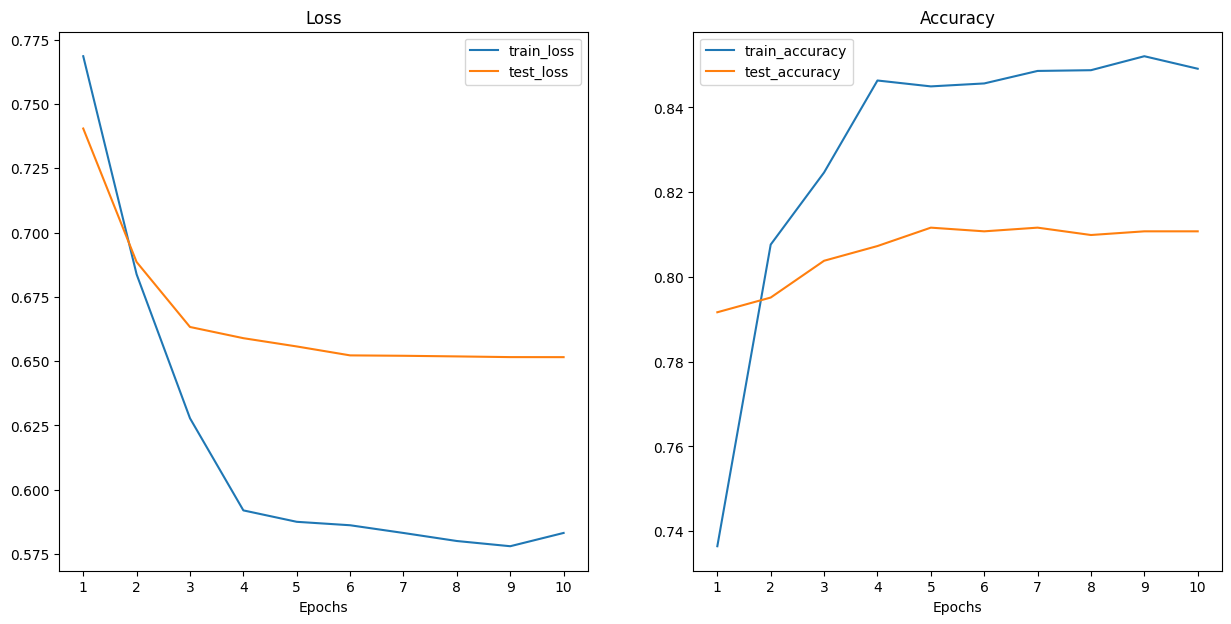

In [205]:
plot_loss_curves(results)

In [84]:
import torchvision

def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names = None,
                        transform=None):
    """Makes a prediction on a target image with a trained model and plots the image and prediction."""
    # Load in the image
    image = Image.open(image_path)
    w, h = image.size

    # Transform if necessary
    if transform:
        target_image = transform(image)

    # Turn on eval/inference mode and make a prediction
    model.eval()
    with torch.inference_mode():
        # Add an extra dimension to the image (this is the batch dimension, e.g. our model will predict on batches of 1x image)
        target_image = target_image.unsqueeze(0)

        # Make a prediction on the image with an extra dimension
        target_image_pred = model(target_image) # make sure the target image is on the right device

        # Convert logits -> prediction probabilities
        target_image_pred_probs = torch.sigmoid(target_image_pred)

    pred = (target_image_pred_probs > 0.5).float().numpy()

    # result_labels = ', '.join([list(df_attr.columns[:1][i]) for i in np.where(pred==1)][0])

    # Plot the image alongside the prediction and prediction probability
    #plt.figure(figsize=(10,12))
    #plt.imshow(target_image.squeeze(0).permute(1,2,0))
    plt.imshow(image)
    #title = f"Pred: {result_labels}"

    #w, h = 224,224
    plt.text(x=w*1.1, y=h, s='\n'.join([f'{k}: {v}\n' for k, v in zip(features, ['No' if x == 0 else 'Yes' for x in pred[0]])]), fontdict={'fontsize':6}, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))
    #plt.title(title)
    #plt.axis(False)

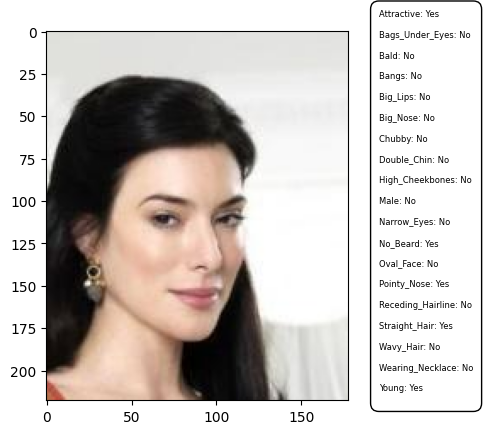

In [168]:
pred_and_plot_image(model=model.to('cpu'),
                    image_path='/content/data/img_align_celeba/img_align_celeba/167111.jpg',
                    class_names=features,
                    transform=val_transformer)